In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import math
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\britn\anaconda3\envs\iod\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data=pd.read_csv('../DATA/banking.csv', header=0)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


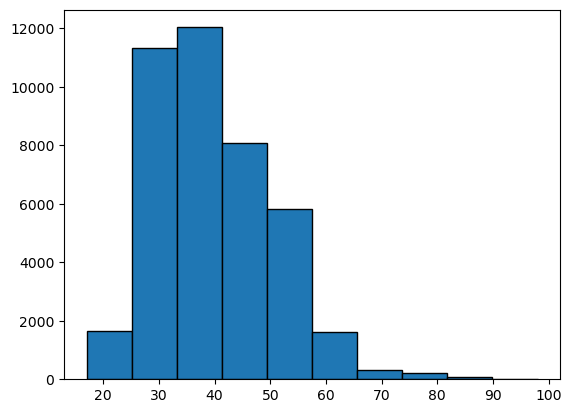

In [3]:
plt.hist(data['age'], bins=10, edgecolor='black')
plt.show()

In [6]:
data['age'].min()

17

In [7]:
data['age'].max()

98

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp_var_rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons_price_idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons_conf_idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr_employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [10]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [11]:
data['age'].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
91       2
89       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

In [14]:
age_class = []  # Initialize an empty list to store the age classes

for x in data.age:  # Iterate through each age in the 'data.age' list
    if x < 25:  # Check if age is less than 25
        age_class.append('17-25')  # If yes, add '17-25' to the 'age_class' list
    elif 25 <= x < 35:  # Check if age is between 25 and 34 (inclusive)
        age_class.append('26-35')  # If yes, add '26-35' to the 'age_class' list
    elif 35 <= x < 45:  # Check if age is between 35 and 44 (inclusive)
        age_class.append('36-45')  # If yes, add '36-45' to the 'age_class' list
    elif 45 <= x < 55:  # Check if age is between 45 and 54 (inclusive)
        age_class.append('46-55')  # If yes, add '46-55' to the 'age_class' list
    else:
        age_class.append('56+')  # If none of the above conditions match, the age is 55 or above, so add '56+'

In [15]:
data['age_group'] = age_class

In [16]:
data.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,age_group
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,36-45


In [17]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [21]:
data['age_group'].value_counts()

26-35    13686
36-45    13500
46-55     8704
56+       4230
17-25     1068
Name: age_group, dtype: int64

In [19]:
grouped_counts = data.groupby(['age_group', 'y']).size()

In [20]:
grouped_counts

age_group  y
17-25      0      812
           1      256
26-35      0    12020
           1     1666
36-45      0    12332
           1     1168
46-55      0     7951
           1      753
56+        0     3433
           1      797
dtype: int64